In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation, rc
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('globalterrorism_db.csv', encoding = "ISO-8859-1")
df = df[['iyear','imonth','iday','country','country_txt','city','suicide','attacktype1','attacktype1_txt','targtype1','targtype1_txt','natlty1','natlty1_txt','nperps','weaptype1','weaptype1_txt','extended','success','nwound','nkill','nkillter','propextent_txt']]
df1 = df.dropna(subset = ['extended','success','nwound','nkill','nkillter','propextent_txt'])
df1 = df1.reset_index(drop=True) 
df1 = df1.fillna(0)

df1.columns.tolist()

FileNotFoundError: [Errno 2] File b'globalterrorism_db.csv' does not exist: b'globalterrorism_db.csv'

In [39]:
for i in range(44687):
  if df1['weaptype1'][i] == 'Firearms':
    df1['weaptype1'][i] = 5

In [40]:
for i in range(44687):
  s = df1['propextent_txt'][i].split()
  if s[0] == 'Unknown' or s[0] == '-99':
    df1['propextent_txt'][i] = 0
  if s[0] == 'Minor':
    df1['propextent_txt'][i] = 1
  if s[0] == 'Major':
    df1['propextent_txt'][i] = 2
  if s[0] == 'Catastrophic':
    df1['propextent_txt'][i] = 3

In [41]:
df1 = df1.astype({'imonth':int,'iday':int,'country':int,'suicide':int,'attacktype1':int,'targtype1':int,'natlty1':int,'weaptype1':int,'extended':int,'success':int,'nwound':int,'nkill':int,'nkillter':int,'propextent_txt':int})

In [42]:
X1 = df1[['imonth','iday','country','suicide','attacktype1','targtype1','natlty1','weaptype1']][:40000]
X1

,imonth,iday,country,suicide,attacktype1,targtype1,natlty1,weaptype1
0,1,1,217,0,2,3,217,5
1,1,2,217,0,3,21,217,6
2,1,2,217,0,7,4,217,8
3,1,3,217,0,7,2,217,8
4,1,6,217,0,7,4,217,8
...,...,...,...,...,...,...,...,...
39995,8,14,4,0,3,3,4,6
39996,8,14,153,0,3,1,153,6
39997,8,14,173,0,3,9,173,6
39998,8,14,4,0,3,3,4,6


In [43]:
Y1 = df1[['extended','success','nwound','nkill','nkillter','propextent_txt']][:40000]
Y1

,extended,success,nwound,nkill,nkillter,propextent_txt
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
39995,0,1,4,1,0,0
39996,0,1,14,0,0,1
39997,0,1,6,0,0,0
39998,0,1,3,3,0,1


In [44]:
X2 = df1[['imonth','iday','country','suicide','attacktype1','targtype1','natlty1','weaptype1']][40001:]
Y2 = df1[['extended','success','nwound','nkill','nkillter','propextent_txt']][40001:]

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
model =  RandomForestRegressor(n_estimators=10 ,
                               oob_score=True,
                               random_state=1)
model.fit(X1, Y1) # обучение

extended = 0
success = 0
nwound = 0
nkill = 0
nkillter = 0
propextent_txt = 0

In [46]:
def pred_t(imonth,iday,country,suicide,attacktype1,targtype1,natlty1,weaptype1,model):
  df = []
  global extended,success,nwound,nkill,nkillter,propextent_txt
  d_f = [imonth,iday,country,suicide,attacktype1,targtype1,natlty1,weaptype1]
  df.append(d_f)
  df = np.array(df)
  a = model.predict(df)
  new_df = a[0]
  extended = round(new_df[0])
  success = round(new_df[1])
  nwound = round(new_df[2])
  nkill = round(new_df[3])
  nkillter = round(new_df[4])
  propextent_txt = round(new_df[5])

In [47]:
import tkinter as tk
from tkinter import ttk
from tkinter import *

def clicked():
    iday = int(day)
    imonth = int(month)
    co = country123.split()
    country = int(co[0])
    bo = bombers.split()
    suicide = int(bo[0])
    at = atype.split()
    attacktype1 = int(at[0])
    tar = targtype.split()
    targtype1 = int(tar[0])
    targ = targnation.split()
    natlty1 = int(targ[0])
    weap = weaptype.split()
    weaptype1 = int(weap[0])
    pred_t(imonth,iday,country,suicide,attacktype1,targtype1,natlty1,weaptype1,model)
    result = Tk()
    result.title("Результат анализа террористического акта")
    result.geometry('470x600')
    label = Label(result, text="Результат" , font=("Arial Bold", 50))  
    label.grid(column=0, row=0) 
    label = Label(result, text="Длительность более 24 часов: %s" %extended, font=("Arial Bold", 20))  
    label.grid(column=0, row=2) 
    label = Label(result, text="Достижение цели террористами: %s" %success , font=("Arial Bold", 20))  
    label.grid(column=0, row=4) 
    label = Label(result, text="Количество раненых: %s"%nwound , font=("Arial Bold", 20))  
    label.grid(column=0, row=6) 
    label = Label(result, text="Количество убитых: %s"%nkill , font=("Arial Bold", 20))  
    label.grid(column=0, row=8) 
    label = Label(result, text="Количество убитых среди террористов: %s"%nkillter , font=("Arial Bold", 20))  
    label.grid(column=0, row=10) 
    label = Label(result, text="Приблизительный ущерб(0 = Неизвестно, \n 1 = ущерб меньше 1млн$ \n 2 = ущерб от 1млн$ до 1 млр$ \n 3 = ущерб больше 1млрд$): %s"%propextent_txt , font=("Arial Bold", 20))  
    label.grid(column=0, row=12) 
  

def on_select(event = None):
    global day
    day = ' '
    if event:
        day = combo.get()
        

def on_select1(event = None):
    global month 
    month = ' '
    if event:
        month = combo1.get()
        

def on_select2(event = None):
    global country123 
    country123 = ' '
    if event:
        country123 = combo2.get()

        
        
def on_select3(event = None):
    global bombers 
    bombers = ' '
    if event:
        bombers = combo3.get()

    
def on_select4(event = None):
    global atype 
    atype = ' '
    if event:
        atype = combo4.get()

        
def on_select5(event = None):
    global targtype
    targtype = ' '
    if event:
        targtype = combo5.get()

        
def on_select6(event = None):
    global targnation 
    targnation = ' '
    if event:
        targnation = combo6.get()

        
def on_select7(event = None):
    global weaptype
    weaptype = ' '
    if event:
        weaptype = combo7.get()

        







window = tk.Tk()  
window.title("Анализ террористического акта")  
x = (window.winfo_screenwidth() - window.winfo_reqwidth()) / 2 
y = (window.winfo_screenheight() - window.winfo_reqheight()) / 2 
window.wm_geometry("+%d+%d" % (x, y)) 
lbl = Label(window, text="День ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=0)  
lbl = Label(window, text=" Месяц ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=1)  
lbl = Label(window, text=" Страна ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=2)  
lbl = Label(window, text=" Террористы-смертники ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=3)  
lbl = Label(window, text=" Тип атаки ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=4)  
lbl = Label(window, text=" Тип цели ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=5) 
lbl = Label(window, text=" Национальность цели ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=6)  
lbl = Label(window, text=" Тип оружия ", font=("Arial Bold", 20))  
lbl.grid(column=0, row=7) 
combo = ttk.Combobox(window, values = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31] ,state = 'readonly')      
combo.grid(column=5, row=0)
combo.bind('<<ComboboxSelected>>', on_select)
combo.current(0)
combo1 = ttk.Combobox(window,values = [1,2,3,4,5,6,7,8,9,10,11,12],state = 'readonly')   
combo1.grid(column=5, row=1)
combo1.bind('<<ComboboxSelected>>', on_select1)
combo1.current(0)
combo2 = ttk.Combobox(window, values = ['4 = Afghanistan', '5 = Albania ','6 = Algeria ','7 = Andorra ','8 = Angola ','10 = Antigua and Barbuda', '11 = Argentina ','12 = Armenia ','14 = Australia', '15 = Austria ','16 = Azerbaijan', '17 = Bahamas', '18 = Bahrain ','19 = Bangladesh', '20 = Barbados', '21 = Belgium', '22 = Belize ','23 = Benin ','24 = Bermuda*', '25 = Bhutan ','26 = Bolivia ','28 = Bosnia-Herzegovina', '29 = Botswana', '30 = Brazil ','31 = Brunei ','32 = Bulgaria ','33 = Burkina Faso', '34 = Burundi ','35 = Belarus ','36 = Cambodia ','37 = Cameroon', '38 = Canada ','41 = Central African Republic', '42 = Chad ','43 = Chile ','44 = China ','45 = Colombia ','46 = Comoros ','47 = Republic of the Congo', '49 = Costa Rica', '50 = Croatia', '51 = Cuba ','53 = Cyprus ','54 = Czech Republic', '55 = Denmark ','56 = Djibouti ','57 = Dominica ','58 = Dominican Republic', '59 = Ecuador', '60 = Egypt ','61 = El Salvador ','62 = Equatorial Guinea', '63 = Eritrea ','64 = Estonia ','65 = Ethiopia ','66 = Falkland Islands', '67 = Fiji ','68 = Finland ','69 = France ','70 = French Guiana ','71 = French Polynesia', '72 = Gabon ','73 = Gambia ','74 = Georgia ','75 = Germany', '76 = Ghana ','78 = Greece ','79 = Greenland*', '80 = Grenada ','81 = Guadeloupe', '83 = Guatemala', '84 = Guinea ','85 = Guinea-Bissau', '86 = Guyana', '87 = Haiti ','88 = Honduras ','89 = Hong Kong', '90 = Hungary', '91 = Iceland', '92 = India ','93 = Indonesia', '94 = Iran ','95 = Iraq ','96 = Ireland ','97 = Israel ','98 = Italy ','99 = Ivory Coast', '100 = Jamaica', '101 = Japan ','102 = Jordan ','103 = Kazakhstan', '104 = Kenya ','106 = Kuwait ','107 = Kyrgyzstan', '108 = Laos ','109 = Latvia ','110 = Lebanon ','111 = Lesotho ','112 = Liberia ','113 = Libya ','114 = Liechtenstein*', '115 = Lithuania ','116 = Luxembourg', '117 = Macau ','118 = Macedonia ','119 = Madagascar', '120 = Malawi ','121 = Malaysia ','122 = Maldives', '123 = Mali ','124 = Malta ','125 = Man, Isle of* ','126 = Marshall Islands*', '127 = Martinique ','128 = Mauritania', '129 = Mauritius', '130 = Mexico ','132 = Moldova ','134 = Mongolia* ','136 = Morocco ','137 = Mozambique', '138 = Myanmar', '139 = Namibia', '141 = Nepal ','142 = Netherlands ','143 = New Caledonia', '144 = New Zealand', '145 = Nicaragua', '146 = Niger ','147 = Nigeria ','149 = North Korea', '151 = Norway ','152 = Oman* ','153 = Pakistan ','155 = West Bank and Gaza Strip', '156 = Panama ','157 = Papua New Guinea', '158 = Paraguay', '159 = Peru ','160 = Philippines', '161 = Poland ','162 = Portugal ','163 = Puerto Rico*', '164 = Qatar ','166 = Romania', '167 = Russia ','168 = Rwanda ','169 = Saba (Netherlands Antilles)*', '173 = Saudi Arabia', '174 = Senegal ','175 = Serbia-Montenegro', '176 = Seychelles ','177 = Sierra Leone', '178 = Singapore ','179 = Slovak Republic', '180 = Slovenia ','181 = Solomon Islands', '182 = Somalia ','183 = South Africa ','184 = South Korea', '185 = Spain ','186 = Sri Lanka ','189 = St. Kitts and Nevis', '190 = St. Lucia ','192 = St. Martin*', '195 = Sudan ','196 = Suriname ','197 = Swaziland', '198 = Sweden ','199 = Switzerland', '200 = Syria ','201 = Taiwan ','202 = Tajikistan ','203 = Tanzania', '204 = Togo ','205 = Thailand ','206 = Tonga* ','207 = Trinidad and Tobago', '208 = Tunisia ','209 = Turkey ','210 = Turkmenistan', '212 = Tuvalu* ','213 = Uganda ','214 = Ukraine ','215 = United Arab Emirates', '216 = Great Britain* ','217 = United States', '218 = Uruguay ','219 = Uzbekistan', '220 = Vanuatu ','221 = Vatican City', '222 = Venezuela', '223 = Vietnam ','225 = Virgin Islands (U.S.)*', '226 = Wallis and Futuna', '228 = Yemen ','229 = Democratic Republic of the Congo', '230 = Zambia ','231 = Zimbabwe ','233 = Northern Ireland*', '235 = Yugoslavia ','236 = Czechoslovakia', '238 = Corsica*', '334 = Asian* ','347 = East Timor ','349 = Western Sahara ','351 = Commonwealth of Independent States*', '359 = Soviet Union ','362 = West Germany (FRG)', '377 = North Yemen', '403 = Rhodesia ','406 = South Yemen ','422 = International ','428 = South Vietnam', '499 = East Germany (GDR)', '520 = Sinhalese*', '532 = New Hebrides', '603 = United Kingdom', '604 = Zaire', '605 = People‘s Republic of the Congo', '999 = Multinational*', '1001 = Serbia', '1002 = Montenegro', '1003 = Kosovo','1004 = South Sudan'],state = 'readonly')  
combo2.grid(column=5, row=2)
combo2.bind('<<ComboboxSelected>>', on_select2)
combo2.current(0)
combo3 = ttk.Combobox(window, values = ['0 = Нет', '1 = Да'], state = 'readonly')     
combo3.grid(column=5, row=3)
combo3.bind('<<ComboboxSelected>>', on_select3)
combo3.current(0)
combo4 = ttk.Combobox(window, values = ['1 = Убийство','2 = Вооруженное Нападение','3 = Взрыв/Бомбежка','4 = Угон/Захват','5 = Захват Заложников(Захват Здания с заложниками)',
'6 = Взятие Заложников(Перемещение и удержание заложников)','7 = Атака сооружений(Здание, монумент, поезд)','8 = Невооруженное Нападение', '9 = Неизвестно'],state = 'readonly')    
combo4.grid(column=5, row=4)
combo4.bind('<<ComboboxSelected>>', on_select4)
combo4.current(0)
combo5 = ttk.Combobox(window, values = ['1 = Бизнес(ИП или организация, например ресторан или заправка)','2 = Правительство','3 = Полиция','4 = Военные',
'5 = Клиники','6 = Аэропорты','7 = Правительство(Дипломатическое)','8 = Учебные заведения','9 = Продовльственные организации или системы водоснабжения',
'10 = Журналисты и медиа','11 = Морской транспорт','12 = Негосударственные организации','13 = Другое',
'14 = Частные лица и их собственность','15 = Религиозные учреждения','16 = Телекоммуникация','17 = Негосударственное ополчение/Другая террористическая группа',
'18 =Туристы','19 = Транспорт(кроме воздушного)', '20 = Неизвестно','21 = Заводы и производства(энергетические)','22 = Жестокие политические партии'],state = 'readonly')     
combo5.grid(column=5, row=5)
combo5.bind('<<ComboboxSelected>>', on_select5)
combo5.current(0)
combo6 = ttk.Combobox(window, values = ['4 = Afghanistan', '5 = Albania ','6 = Algeria ','7 = Andorra ','8 = Angola ','10 = Antigua and Barbuda', '11 = Argentina ','12 = Armenia ','14 = Australia', '15 = Austria ','16 = Azerbaijan', '17 = Bahamas', '18 = Bahrain ','19 = Bangladesh', '20 = Barbados', '21 = Belgium', '22 = Belize ','23 = Benin ','24 = Bermuda*', '25 = Bhutan ','26 = Bolivia ','28 = Bosnia-Herzegovina', '29 = Botswana', '30 = Brazil ','31 = Brunei ','32 = Bulgaria ','33 = Burkina Faso', '34 = Burundi ','35 = Belarus ','36 = Cambodia ','37 = Cameroon', '38 = Canada ','41 = Central African Republic', '42 = Chad ','43 = Chile ','44 = China ','45 = Colombia ','46 = Comoros ','47 = Republic of the Congo', '49 = Costa Rica', '50 = Croatia', '51 = Cuba ','53 = Cyprus ','54 = Czech Republic', '55 = Denmark ','56 = Djibouti ','57 = Dominica ','58 = Dominican Republic', '59 = Ecuador', '60 = Egypt ','61 = El Salvador ','62 = Equatorial Guinea', '63 = Eritrea ','64 = Estonia ','65 = Ethiopia ','66 = Falkland Islands', '67 = Fiji ','68 = Finland ','69 = France ','70 = French Guiana ','71 = French Polynesia', '72 = Gabon ','73 = Gambia ','74 = Georgia ','75 = Germany', '76 = Ghana ','78 = Greece ','79 = Greenland*', '80 = Grenada ','81 = Guadeloupe', '83 = Guatemala', '84 = Guinea ','85 = Guinea-Bissau', '86 = Guyana', '87 = Haiti ','88 = Honduras ','89 = Hong Kong', '90 = Hungary', '91 = Iceland', '92 = India ','93 = Indonesia', '94 = Iran ','95 = Iraq ','96 = Ireland ','97 = Israel ','98 = Italy ','99 = Ivory Coast', '100 = Jamaica', '101 = Japan ','102 = Jordan ','103 = Kazakhstan', '104 = Kenya ','106 = Kuwait ','107 = Kyrgyzstan', '108 = Laos ','109 = Latvia ','110 = Lebanon ','111 = Lesotho ','112 = Liberia ','113 = Libya ','114 = Liechtenstein*', '115 = Lithuania ','116 = Luxembourg', '117 = Macau ','118 = Macedonia ','119 = Madagascar', '120 = Malawi ','121 = Malaysia ','122 = Maldives', '123 = Mali ','124 = Malta ','125 = Man, Isle of* ','126 = Marshall Islands*', '127 = Martinique ','128 = Mauritania', '129 = Mauritius', '130 = Mexico ','132 = Moldova ','134 = Mongolia* ','136 = Morocco ','137 = Mozambique', '138 = Myanmar', '139 = Namibia', '141 = Nepal ','142 = Netherlands ','143 = New Caledonia', '144 = New Zealand', '145 = Nicaragua', '146 = Niger ','147 = Nigeria ','149 = North Korea', '151 = Norway ','152 = Oman* ','153 = Pakistan ','155 = West Bank and Gaza Strip', '156 = Panama ','157 = Papua New Guinea', '158 = Paraguay', '159 = Peru ','160 = Philippines', '161 = Poland ','162 = Portugal ','163 = Puerto Rico*', '164 = Qatar ','166 = Romania', '167 = Russia ','168 = Rwanda ','169 = Saba (Netherlands Antilles)*', '173 = Saudi Arabia', '174 = Senegal ','175 = Serbia-Montenegro', '176 = Seychelles ','177 = Sierra Leone', '178 = Singapore ','179 = Slovak Republic', '180 = Slovenia ','181 = Solomon Islands', '182 = Somalia ','183 = South Africa ','184 = South Korea', '185 = Spain ','186 = Sri Lanka ','189 = St. Kitts and Nevis', '190 = St. Lucia ','192 = St. Martin*', '195 = Sudan ','196 = Suriname ','197 = Swaziland', '198 = Sweden ','199 = Switzerland', '200 = Syria ','201 = Taiwan ','202 = Tajikistan ','203 = Tanzania', '204 = Togo ','205 = Thailand ','206 = Tonga* ','207 = Trinidad and Tobago', '208 = Tunisia ','209 = Turkey ','210 = Turkmenistan', '212 = Tuvalu* ','213 = Uganda ','214 = Ukraine ','215 = United Arab Emirates', '216 = Great Britain* ','217 = United States', '218 = Uruguay ','219 = Uzbekistan', '220 = Vanuatu ','221 = Vatican City', '222 = Venezuela', '223 = Vietnam ','225 = Virgin Islands (U.S.)*', '226 = Wallis and Futuna', '228 = Yemen ','229 = Democratic Republic of the Congo', '230 = Zambia ','231 = Zimbabwe ','233 = Northern Ireland*', '235 = Yugoslavia ','236 = Czechoslovakia', '238 = Corsica*', '334 = Asian* ','347 = East Timor ','349 = Western Sahara ','351 = Commonwealth of Independent States*', '359 = Soviet Union ','362 = West Germany (FRG)', '377 = North Yemen', '403 = Rhodesia ','406 = South Yemen ','422 = International ','428 = South Vietnam', '499 = East Germany (GDR)', '520 = Sinhalese*', '532 = New Hebrides', '603 = United Kingdom', '604 = Zaire', '605 = People‘s Republic of the Congo', '999 = Multinational*', '1001 = Serbia', '1002 = Montenegro', '1003 = Kosovo','1004 = South Sudan'],state = 'readonly')      
combo6.grid(column=5, row=6)
combo6.bind('<<ComboboxSelected>>', on_select6)
combo6.current(0)
combo7 = ttk.Combobox(window, values = ['1 = Биологическое', '2 = Химическое','3 = Радиационное', '4 = Ядерное/Атомное',
'5 = Огнестрельное Оружие','6 = Взрывчатые в-ва', '7 = Фальшивое Оружие','8 = Зажигательные смеси','9 = Оружие ближнего боя',
'10 = Транспортное с-во','11 = Диверсионное оборудование','12 = Другое','13 = Неизвестно'], state = 'readonly')     
combo7.grid(column=5, row=7)
combo7.bind('<<ComboboxSelected>>', on_select7)
combo7.current(0)




btn = Button(window, text="Расчёт", command=clicked)  
btn.grid(column=8, row=10)  


window.mainloop()






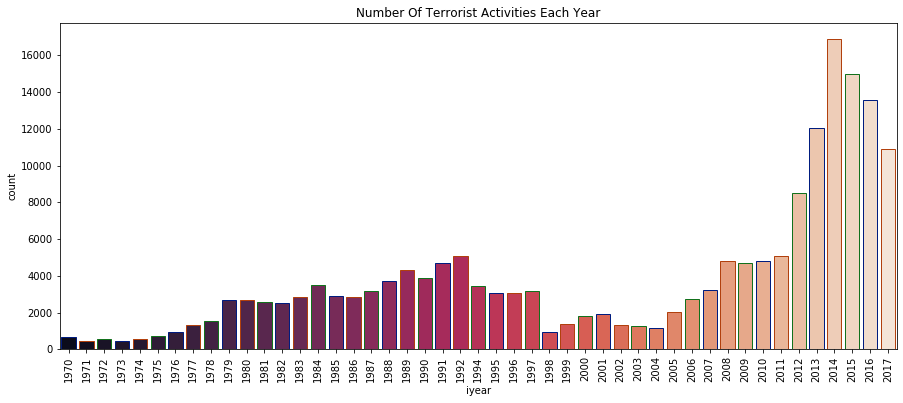

In [48]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=df,palette='rocket',edgecolor=sns.color_palette('dark',3))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()




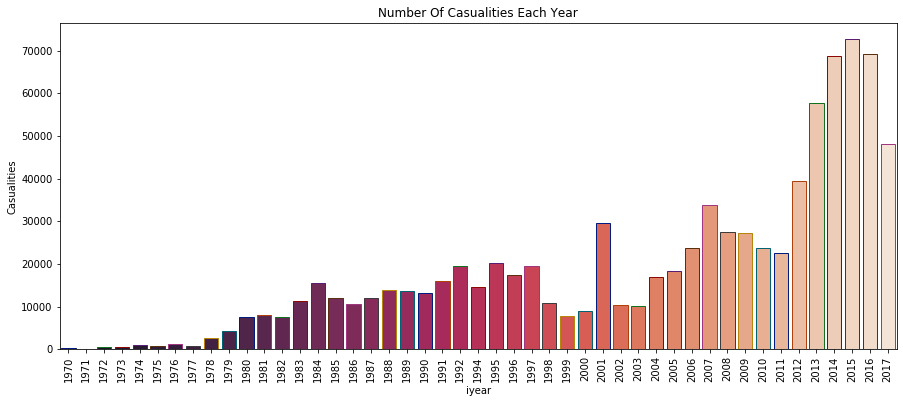

In [49]:
plt.subplots(figsize=(15,6))
df['Casualities'] = df.nkill + df.nwound
year_cas = df.groupby('iyear').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['iyear','Casualities']
sns.barplot(x=year_cas.iyear, y=year_cas.Casualities, palette='rocket',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

ERROR: Could not find a version that satisfies the requirement Tkinter (from versions: none)
ERROR: No matching distribution found for Tkinter
Note: you may need to restart the kernel to use updated packages.
